In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os
import csv
%matplotlib inline

In [3]:
VAL_PATH = "data/images/val/"
val_names = os.listdir(VAL_PATH)
print(len(val_names))

10000


In [4]:
# category names
num_to_name = {}

CATEGORIES_PATH = "development_kit/data/categories.txt"
with open(CATEGORIES_PATH, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        num_to_name[row[1]] = row[0]

In [5]:
categories = {}
val_labels = []

# use csv reader to construct dictionary between filenames and category.
VAL_LABEL_PATH = "development_kit/data/val-mine.txt"
with open(VAL_LABEL_PATH, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        categories[row[0]] = row[1]
        val_labels.append(int(row[1]))

In [6]:
def show(path, img_name):
    img_path = path + img_name
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(num_to_name[categories[img_name]])
    print(categories[img_name])

93


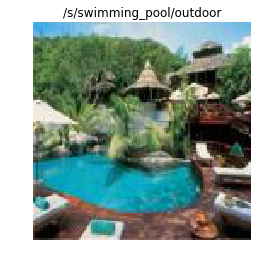

In [7]:
show(VAL_PATH, val_names[3])

# Make Model

In [8]:
# Keras Imports
from keras.layers import Activation, Reshape, Dropout, Dense,Flatten
from keras.layers import AtrousConvolution2D, Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2DTranspose
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import plot_model
import keras.preprocessing.image as kimage
import keras.backend
keras.backend.set_image_data_format('channels_last')

Using TensorFlow backend.


In [9]:
def makemodel():
    model = Sequential()
    model.add(Convolution2D(filters=64,kernel_size=(3, 3), input_shape=(128,128,3), padding='same'))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Convolution2D(kernel_size = (3,3), filters = 32, padding='same'))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    #model.add(Flatten())
    model.add(Convolution2D(filters=64, kernel_size=(1,1)))
    model.add(Dropout(rate= 0.5))
    model.add(Flatten())
    model.add(Dense(units=100))
    #model.add(Reshape((-1,10)))
    model.add(Activation('softmax'))
    return model

model = makemodel()

print(model.summary())

# compile the model with crossentropy loss function.
model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        2112      
__________

# Train the model

In [10]:
def make_one_hot(label):
    a = [0] * 100
    a[label] = 1
    return np.array(a)
    
def transform_labels_to_one_hot(labels):
    a = []
    for label in labels:
        a.append(make_one_hot(label))
    return np.array(a)

In [11]:
val_labels_one_hot = transform_labels_to_one_hot(val_labels)

In [12]:
np.argmax(val_labels_one_hot[3])

93

In [13]:
all_vals = []
for img_name in val_names:
    img_path = VAL_PATH + img_name
    all_vals.append(mpimg.imread(img_path))
all_vals = np.array(all_vals)

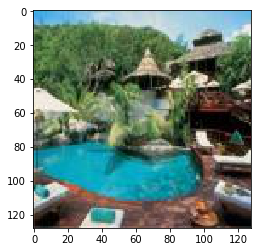

In [14]:
all_vals
plt.imshow(all_vals[3])

In [16]:
model.fit(all_vals, val_labels_one_hot, epochs=1, batch_size=128)

Epoch 1/1
10000/10000 [==============================] - 441s - loss: 15.9569 - acc: 0.0100   


In [ ]:
model.save('my_model.h5')

In [ ]:
result = model.evaluate(all_vals, val_labels_one_hot, batch_size=128)
print("Loss on valid set:"  + str(result[0]) + " Accuracy on valid set: " + str(result[1]))